# WeatherPy
----

### Analysis
1) Appears to be a strong relationship between latitude temperature. The southern hemisphere is generally around the same temperature regardless of latitude, while the northern hemisphere gets colder the further away from the equator.

2) No strong relationship between cloudiness and latitude. It appears that the data provided by the API is in 5% increments with clustering around 0, 20, and 75 percent.

3) No strong relationship between humidity and latitude. It appears that the data from the API is in 1% increments. Interesting that the vast majority of cities, regardless of latitude, had at least 60% or more humidity.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [17]:
# set query information

api_key = api_keys.api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=" + api_key 

# lists
city_list = []
country = []
date = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
long = []

# set the counter
counter = 0

# print log of each city 
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    try:
        response = requests.get(f'{url}&q={city}').json()
        city_list.append(response['name'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        counter = counter + 1
        print(f'Record {counter} | {city}')
        print(f'{url}&q={city}')
        
        time.sleep(1)
    except:
        print('City cannot be found. Moving on...')
                                

Beginning Data Retrieval
------------------------
Record 1 | east london
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=east london
Record 2 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=mar del plata
Record 3 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=ponta do sol
Record 4 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=punta arenas
Record 5 | jian
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=jian
Record 6 | yerbogachen
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=yerbogachen
Record 7 | carutapera
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=car

Record 61 | voznesenye
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=voznesenye
Record 62 | klaipeda
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=klaipeda
Record 63 | mezen
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=mezen
City cannot be found. Moving on...
Record 64 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=vestmannaeyjar
Record 65 | barrow
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=barrow
Record 66 | hualmay
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=hualmay
Record 67 | atuona
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=atuona
Record 68 | tessalit
http://api.op

City cannot be found. Moving on...
Record 120 | magadi
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=magadi
Record 121 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=ostrovnoy
Record 122 | qinhuangdao
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=qinhuangdao
City cannot be found. Moving on...
Record 123 | castro
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=castro
City cannot be found. Moving on...
Record 124 | dumbea
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=dumbea
Record 125 | mount gambier
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=mount gambier
Record 126 | comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?units=

Record 180 | acapulco
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=acapulco
Record 181 | santo antonio do leverger
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=santo antonio do leverger
Record 182 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=chokurdakh
Record 183 | smidovich
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=smidovich
Record 184 | buala
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=buala
Record 185 | talnakh
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=talnakh
Record 186 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=cabo san lucas
Record 187 | putey

Record 240 | bubaque
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=bubaque
Record 241 | ponta delgada
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=ponta delgada
Record 242 | westport
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=westport
Record 243 | pitimbu
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=pitimbu
City cannot be found. Moving on...
Record 244 | xam nua
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=xam nua
Record 245 | olga
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=olga
Record 246 | leh
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=leh
Record 247 | kruisfontein
http://api.open

Record 299 | omsukchan
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=omsukchan
Record 300 | limbach-oberfrohna
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=limbach-oberfrohna
City cannot be found. Moving on...
Record 301 | heyang
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=heyang
Record 302 | takoradi
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=takoradi
Record 303 | sunndalsora
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=sunndalsora
Record 304 | halifax
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=halifax
Record 305 | tiarei
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=tiarei
Record 30

Record 357 | bazarnyye mataki
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=bazarnyye mataki
Record 358 | agadez
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=agadez
Record 359 | kifri
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=kifri
Record 360 | bull savanna
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=bull savanna
Record 361 | taseyevo
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=taseyevo
Record 362 | chute-aux-outardes
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=chute-aux-outardes
Record 363 | kununurra
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=kununurra
Record 364 | arlit
http://

Record 417 | lushnje
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=lushnje
Record 418 | broome
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=broome
Record 419 | mayo
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=mayo
Record 420 | chabahar
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=chabahar
City cannot be found. Moving on...
Record 421 | altoona
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=altoona
Record 422 | galesong
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=galesong
Record 423 | aswan
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=aswan
Record 424 | rondonopolis
http://api.openweatherm

Record 476 | puerto del rosario
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=puerto del rosario
Record 477 | vredendal
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=vredendal
Record 478 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=sao joao da barra
Record 479 | goryachevodskiy
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=goryachevodskiy
Record 480 | nyandoma
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=nyandoma
Record 481 | prince rupert
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=prince rupert
Record 482 | todos santos
http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=ea211303c25de0a6d3ebd397a7c69c83&q=tod

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
weather_dict = {"City" : city_list, "Cloudiness" : cloudiness, "Country" : country,\
                "Date" : date, "Humidity" : humidity, "Lat" : lat, "Lng" : long,\
                "Max Temp" : temperature, "Wind Speed" : wind_speed}


weather_data = pd.DataFrame(weather_dict)

weather_data.count()



City          534
Cloudiness    534
Country       534
Date          534
Humidity      534
Lat           534
Lng           534
Max Temp      534
Wind Speed    534
dtype: int64

In [19]:
weather_data.head(25)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,East London,32,ZA,1548286775,100,-33.02,27.91,68.39,18.70
1,Mar del Plata,24,AR,1548286513,28,-46.43,-67.52,77.97,17.69
2,Ponta do Sol,56,BR,1548286778,87,-20.63,-46.00,69.02,1.70
3,Punta Arenas,0,CL,1548284400,34,-53.16,-70.91,66.20,14.99
4,Jian,88,IN,1548286780,94,25.65,87.89,57.09,2.93
5,Yerbogachen,92,RU,1548286781,81,61.28,108.01,7.82,7.40
6,Carutapera,88,BR,1548286782,88,-1.20,-46.02,79.37,7.63
7,Bredasdorp,92,ZA,1548284400,62,-34.53,20.04,59.00,2.24
8,Rikitea,92,PF,1548286784,100,-23.12,-134.97,80.18,14.34
9,Leningradskiy,76,RU,1548286786,89,69.38,178.42,-6.36,17.36


In [20]:
# save to csv
weather_data.to_csv("output_data/cities.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

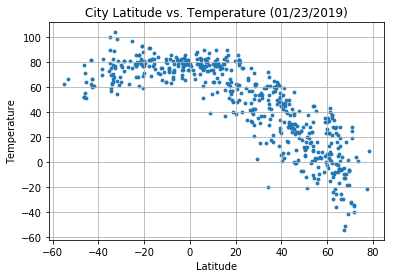

In [21]:
import datetime

date_for_chart = weather_data["Date"][0]

date_for_chart = datetime.datetime.utcfromtimestamp(date_for_chart).strftime('%m/%d/%Y')

plt.scatter(lat, temperature, marker='o', s=8)

plt.title(f"City Latitude vs. Temperature ({date_for_chart})")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()
plt.savefig('output_data/LatTemp.png')
plt.show()

#### Latitude vs. Humidity Plot

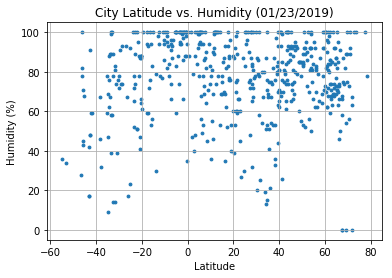

In [22]:
plt.scatter(lat, humidity, marker='o', s=8)

plt.title(f"City Latitude vs. Humidity ({date_for_chart})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('output_data/LatHumid.png')
plt.show()

#### Latitude vs. Cloudiness Plot

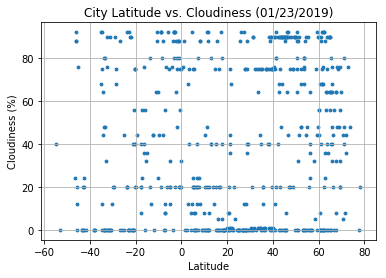

In [23]:
plt.scatter(lat, cloudiness, marker='o', s=8)

plt.title(f"City Latitude vs. Cloudiness ({date_for_chart})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('output_data/LatCloud.png')
plt.show()

#### Latitude vs. Wind Speed Plot

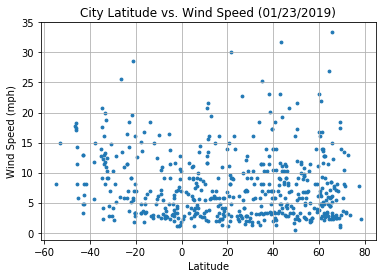

In [24]:
plt.scatter(lat, wind_speed, marker='o', s=8)

plt.title(f"City Latitude vs. Wind Speed ({date_for_chart})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('output_data/LatWind.png')
plt.show()